<a href="https://colab.research.google.com/github/J-Princess/ML-AI-DS-Projects/blob/main/Copy_of_24047695_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Course work

### Insurance Dataset

Welcome to my coursework project; here, I am working with the insurance-adapted data, which was obtained from the Kaggle platform and was uploaded by Miri Choi in 2018 (Shoroog *et al*). The dataset contains seven variables: Age, Charges, Sex, Smoker, Children, BMI and Region.
#### Stakeholders:

They include those who might have an interest in the output of the model or are impacted it. The stakeholders for this project are
- Insurance companies who might use this model to identify customer demographics.
- Data Scientists who use it to conduct analysis and predictions.
- Health care Providers who may use the datasets to understand patient demographics and needs. also to predict patterns in healthcare.
- Machine Learning Engineers who want to build predictions and models based on datasets into real-life applications and systems.
- Coding Communities, communities like Kaggle, which consist of students, researchers and professionals, will use the dataset for competitions and learning.
- Organisations, Companies that want to provide employees with insurance plans.
- Policymakers



### Research Questions

These are questions that arose at every point of this notebook and the execution of this project

1. Who created this data and why?
2. What is the use_case/ what do I aim to predict with the dataset?
3. What information is contained in this dataset?
4. Is the data in the dataset balanced?
5. are there missing values in the datasets?
6. What do I do with the missing data values?
7. Is this a regression or classification problem?
8. What variables will be used for the model?
9. what methods of preprocessing are best suited for the model?
10. What do i do with the categorical data and are they needed for my model?
11. Is the dataset messy? Do I need to clean it?
12. What null hypothesis can be inferred from the data?
13. Does the missing values leave out the same group
14. Will the results of my models vary with different methods of preprocessing?




### Important Note
I made many comparisons but only included some things in this notebook for cleanness, clarity and conciseness. However, they will be stated in the reflections throughout the notebook.

In [ ]:
#importing needed libraries

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from scipy.stats import zscore, ttest_rel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn import tree

# Suppress warnings
warnings.filterwarnings('ignore')

In [ ]:
# loading dataset in a dataframe
insurance_data = pd.read_csv('data/insurance-adapted.csv')

# veiwing dataset
print(insurance_data.shape)

#first 5 rows
print(insurance_data.head())

(1338, 7)
    age     sex     bmi  children smoker     region      charges
0  19.0  female  27.900         0    yes  southwest  16884.92400
1  18.0    male  33.770         1     no  southeast   1725.55230
2  28.0    male  33.000         3     no  southeast   4449.46200
3  33.0    male  22.705         0     no  northwest  21984.47061
4  32.0    male  28.880         0     no  northwest   3866.85520


The data contains 1338 rows and 7 columns.

## Data Exploration

In [ ]:
# Colums in the Dataset
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

The column headers are variable names, not values, and no multiple variables are stored in one column. So, this is not messy data and only needs a little preprocessing.

In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1318 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [ ]:
# Description of dataset
insurance_data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1318.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.216237,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.083151,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [ ]:
insurance_data.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


The datset contains 4 numerical data(float64) and 3 categorical data columns(object). The numerical data have no unique number. The youngest age is 18, while the oldest is 64.

### Visualisation

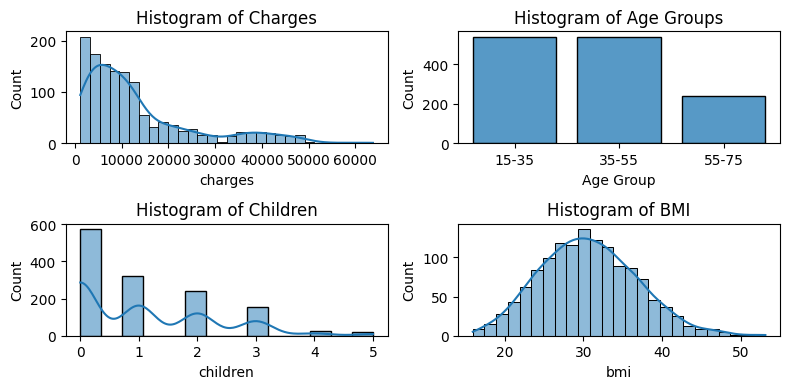

In [ ]:
plt.figure(figsize=(8,4))

plt.subplot(2, 2, 1)
sns.histplot(insurance_data['charges'], kde=True)
plt.title('Histogram of Charges')

plt.subplot(2, 2, 2)
bins = [15, 35, 55, 75]
sns.histplot(insurance_data['age'], kde=False, bins=bins, shrink=0.8)
plt.title('Histogram of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(ticks=[25, 45, 65], labels=['15-35', '35-55', '55-75'])

plt.subplot(2, 2, 3)
sns.histplot(insurance_data['children'], kde=True)
plt.title('Histogram of Children')

plt.subplot(2, 2, 4)
sns.histplot(insurance_data['bmi'], kde=True)
plt.title('Histogram of BMI')



plt.tight_layout()
plt.show()

The figure above shows the distribution of the numerical data in the dataset.
- It appears the charges are right-skewed, indicating that it is not normally distributed as it is heavily skewed towards the lower values, with a few significantly higher values.
- Grouped the age data into 3 bins for a better distribution of the age groups in the age data.
- From the BMI plot, it appears to be the only normally distributed and is also slightly right-skewed.
- Chidren data distribution is not even distibuted.

Can we conclude that the data is biased towards people with fewer children and young and middle-aged groups of people? Or towards Non-smokers.
It is essential to ensure fairness and transparency during data collection.

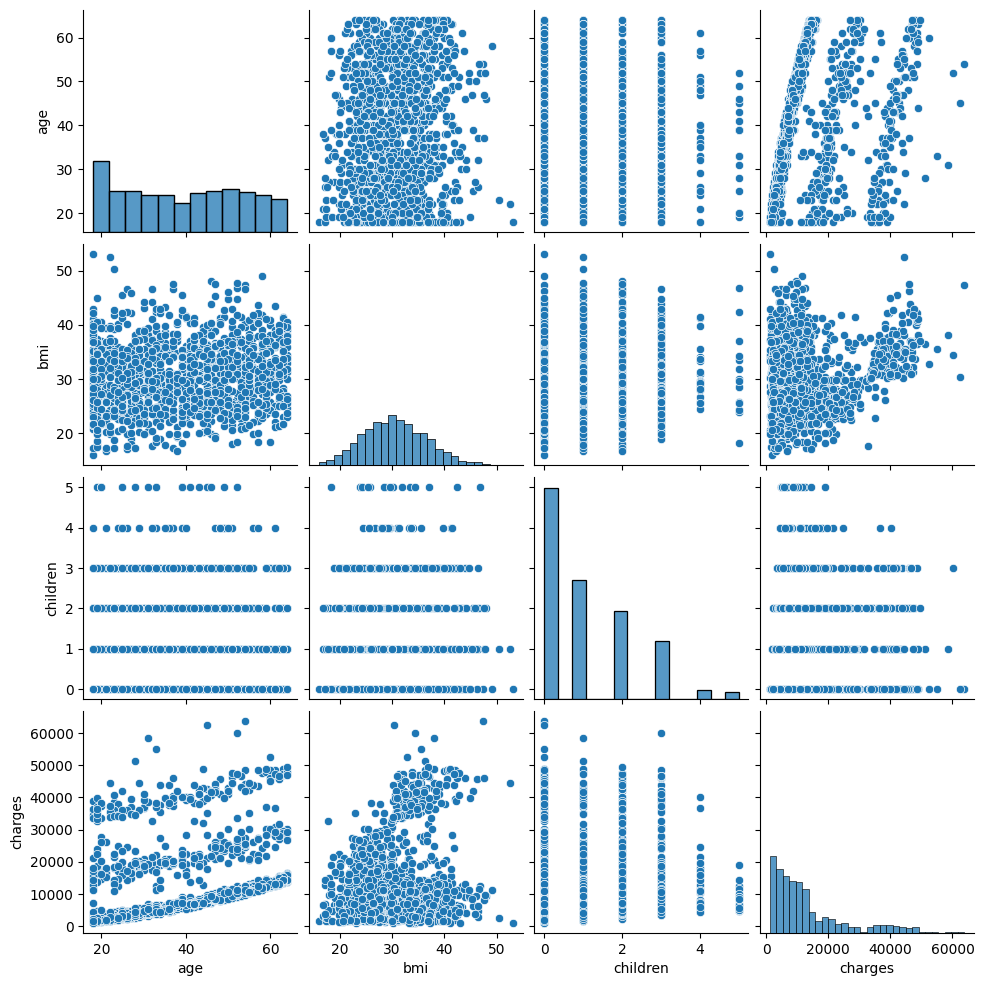

In [ ]:
# A pairplot of the dataset
sns.pairplot(insurance_data)

As seen in the figure above, there are outliers in charges data and it is not normally distributed as it is heavily skewed towards the lower values, as is the children data and age data.

#### Distribution of categorical data



*  Sex


sex
male      676
female    662
Name: count, dtype: int64


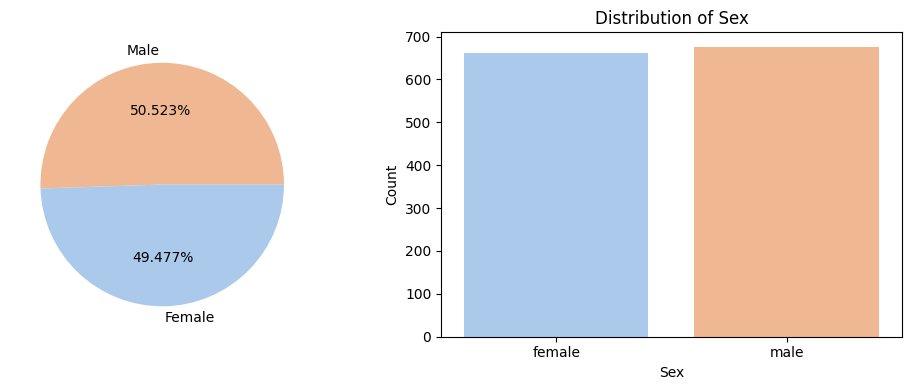

In [ ]:
# Distribution of 'sex'
sex_dist = insurance_data['sex'].value_counts()
print(sex_dist)

plt.figure(figsize=(10, 4))
# Pie Chart
plt.subplot(1, 2, 1)
plt.pie(sex_dist, labels=['Male', 'Female'], autopct='%1.3f%%', colors=['#efb792', '#abc9ea'])

# Count Plot
plt.subplot(1, 2, 2)
sns.countplot(x = insurance_data['sex'], palette='pastel')
plt.title("Distribution of Sex")
plt.xlabel('Sex')
plt.ylabel("Count")

plt.tight_layout()

plt.show()

* Smoker

smoker
no     1064
yes     274
Name: count, dtype: int64


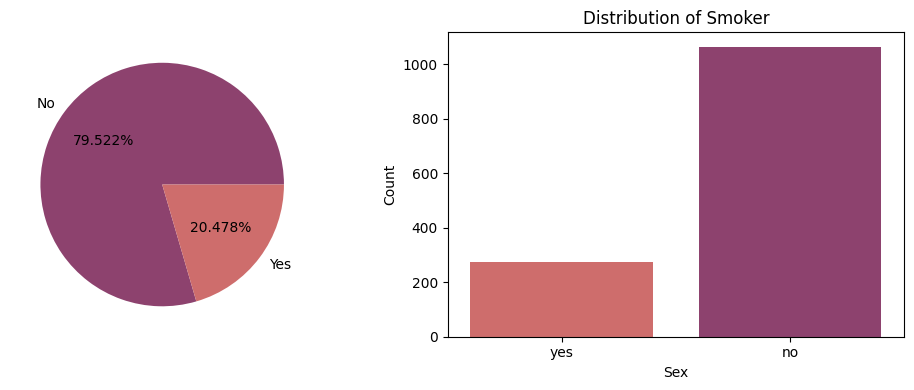

In [ ]:
# Distribution of 'smoker'
smoker_dist = insurance_data['smoker'].value_counts()
print(smoker_dist)

plt.figure(figsize=(10, 4))
# Pie Chart
plt.subplot(1, 2, 1)
plt.pie(smoker_dist, labels=['No', 'Yes'], autopct='%1.3f%%', colors=['#8d426e', '#ce6d6c'])

# Count Plot
plt.subplot(1, 2, 2)
sns.countplot(x = insurance_data['smoker'], palette="flare")
plt.title("Distribution of Smoker")
plt.xlabel('Sex')
plt.ylabel("Count")

plt.tight_layout()

plt.show()

* Region

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


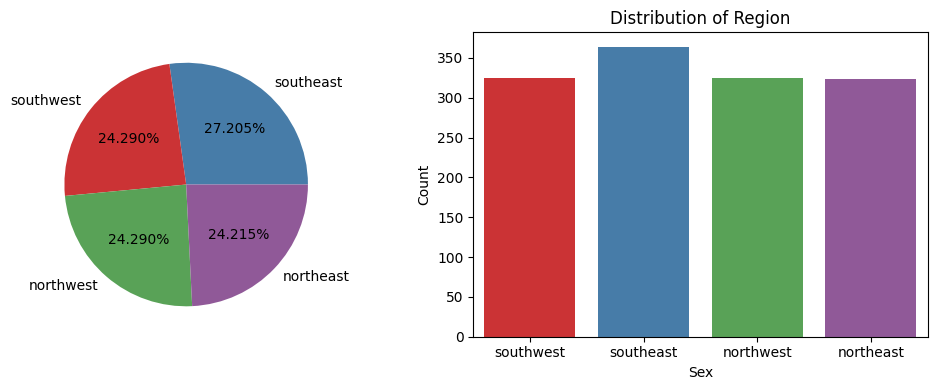

In [ ]:
# Distribution of 'region'
region_dist = insurance_data['region'].value_counts()
print(region_dist)

plt.figure(figsize=(10, 4))
# Pie Chart
plt.subplot(1, 2, 1)
plt.pie(region_dist, labels=region_dist.index, autopct='%1.3f%%', colors=['#477ca8', '#cb3335','#59a257','#905998'])

# Count Plot
plt.subplot(1, 2, 2)
sns.countplot(x = insurance_data['region'], palette="Set1")
plt.title("Distribution of Region")
plt.xlabel('Sex')
plt.ylabel("Count")

plt.tight_layout()

plt.show()

I chose a pie chart and counterplot to visualise the categorical data because it gives a clean visualisation for better comparison and analysis.
From the visualisation above, it can be seen that the sex and region data are fairly balanced, while the smoker data are not balanced.

#### Correlation matrix

Plotting the correlation between numerical features to determine the relationship between numerical variables.

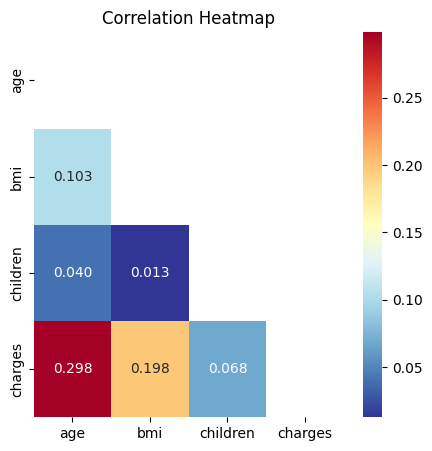

In [ ]:
# modified from code gotten from the insurance-EDA-worksheet in Coursework Support
correlation_matrix = insurance_data.corr(method='pearson', min_periods=1, numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', fmt='.3f', mask=mask)
plt.title('Correlation Heatmap')
plt.show()

### Missing Values

In [ ]:
#Checking dataset for missing values
print('Sum of missing values in the insurance dataset:', insurance_data.isnull().sum())

# Identify where the missing values are located in the dataset
print('Indexes of missing values:', insurance_data[insurance_data.isnull().any(axis=1)].index)

# Percentage of Missing values
print('Percentage:', insurance_data.isnull().sum()/ len(insurance_data) * 100)

Sum of missing values in the insurance dataset: age         20
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
dtype: int64
Indexes of missing values: Index([   5,   37,  135,  190,  264,  265,  407,  409,  482,  496,  549,  551,
        674,  777,  895,  988, 1066, 1153, 1249, 1324],
      dtype='int64')
Percentage: age         1.494768
sex         0.000000
bmi         0.000000
children    0.000000
smoker      0.000000
region      0.000000
charges     0.000000
dtype: float64


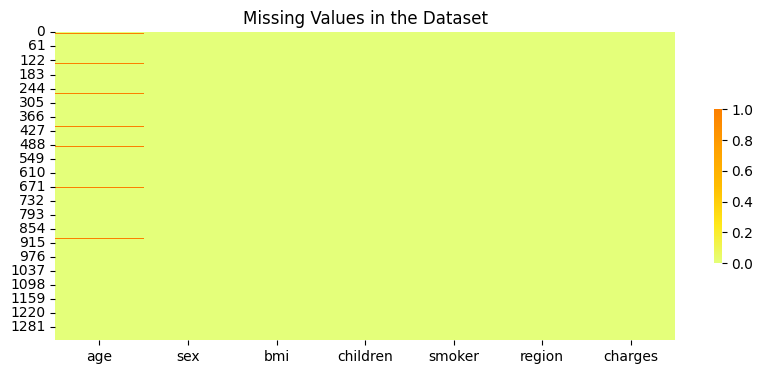

In [ ]:
# modified from code gotten from the insurance-EDA-worksheet in Coursework Support
plt.figure(figsize=(10,4))
sns.heatmap(insurance_data.isnull(),cbar=True,cmap='Wistia', cbar_kws={'shrink': 0.5})
plt.title('Missing Values in the Dataset')

plt.show()

It appears that there are 20 missing values in the age data; the objective, therefore, is to build a model that predicts the missing values. So i will be selecting the age data as my target and the rest of the columns will be used as my features.

### Outliers
from the pairplot visalization of the insurance data above,  Outliers were detected in the dataset, I will be using a different method to detect them and deal with them.

In [ ]:
# Using the Zscore method to detect ouliers
z_scores = zscore(insurance_data['charges'])
outliers = insurance_data[np.abs(z_scores) > 3]

print(outliers.count())

age         7
sex         7
bmi         7
children    7
smoker      7
region      7
charges     7
dtype: int64


There are seven outliers determined by the Zscore method; since the outliers lie in the charges dataset and not my target data, I could ignore them in my model training, but they can distort the mean, standard deviation, and other factors, leading to inaccurate representations of your data and that is not ideal as there are missing values in the dataset. They could lie in the range and influence model performance if the selected model is sensitive to outliers.

The charges data has a log distribution and contains large values. I will use a log transformation because it helps normalise the data, making it linear and easier for models like regression to learn from and see if it reduces the outliers.

      age   sex     bmi  children smoker     region   charges
642  61.0  male  33.915         0     no  northeast  4.118723
721  53.0  male  36.600         3     no  southwest  4.051714
420  64.0  male  33.880         0    yes  southeast  4.671073
707  49.0  male  28.690         3     no  northwest  4.011335
171  49.0  male  30.300         0     no  southwest  3.909378


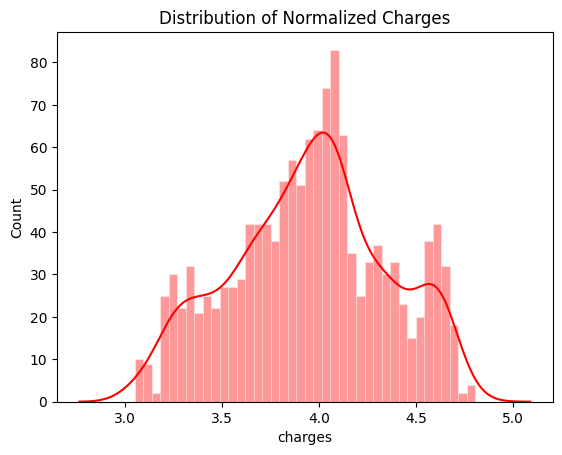

In [ ]:
# Normalizing the charges data
insurance_data['charges'] = np.log10(insurance_data['charges'])

# Viewing the normalised charges
print(insurance_data.sample(5))

# Visualising changes

# modified from code gotten from the insurance-EDA-worksheet in Coursework Support
sns.histplot(insurance_data['charges'], kde=True,
    kde_kws={"cut": 3},
    bins=40,
    color='red',
    alpha=.4,
    edgecolor=(1, 1, 1, .4))

plt.title('Distribution of Normalized Charges')
plt.show()

I didn't apply log transformation to the children's data because it contains small values, and the age data because it contains missing values.

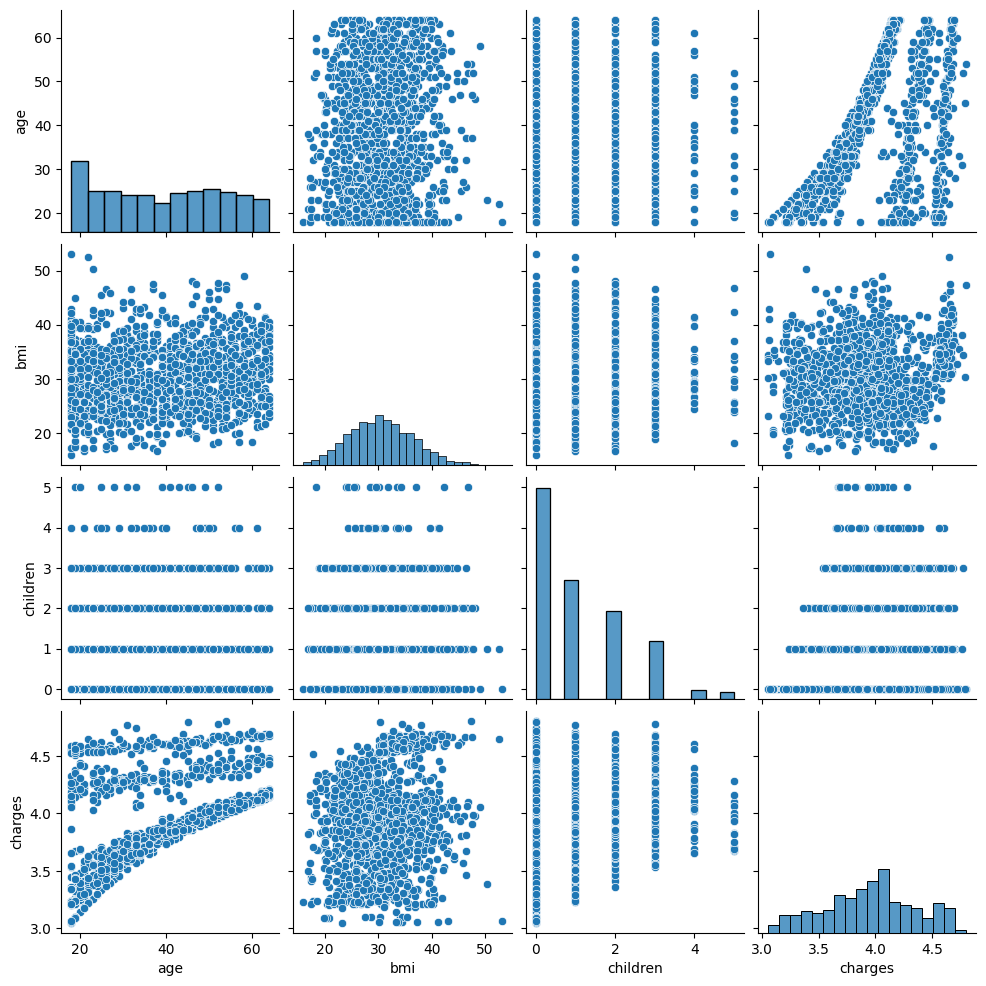

In [ ]:
# Viewing whole dataset after transformation
sns.pairplot(insurance_data)

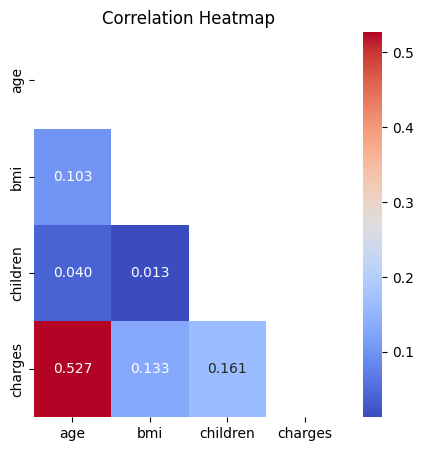

In [ ]:
# Correlation
# modified from code gotten from the insurance-EDA-worksheet in Coursework Support

correlation_matrix = insurance_data.corr(method='pearson', min_periods=1, numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', mask=mask)
plt.title('Correlation Heatmap')
plt.show()


After transformation, the correlation between the age and charges data has increased.

## Feature Engineering


#### Data Splitting

In [ ]:
# Seperating non-null values from null values
non_missing_data = insurance_data[insurance_data['age'].notnull()]
print(non_missing_data.shape)
missing_data = insurance_data[insurance_data['age'].isnull()]
print(missing_data.shape)

# Feature selection
X = non_missing_data.drop(columns=['age'])
y = non_missing_data['age']

# Define seeds for train-test splits and Model Evaluation
seeds = np.arange(10)

# Splitting training data into training and test sets
for seed in seeds:
    train_X, test_X, train_y,test_y = train_test_split(X, y, test_size=0.25, random_state=seed)

# Train size
train_X.shape

(1318, 7)
(20, 7)


(988, 6)

I separated the insurance data into two categories: missing_data, which contains the rows With missing values, and non_missing_data, which includes the rest of the rows. Splitting the data allows me to assess how well my model performs on unseen data, which is crucial for evaluating its predictive power. While using too many variables can lead to the curse of dimensionality, which causes overfitting, I decided to use the remaining variables as features because, from the result of a comparison I made using a mixed selection of variables and all variables, I got a better result using the latter. It allows me to establish a threshold. For the train and test set, I chose a test_size of 0.25 and a random_size of 15 due to the comparisons I made with combinations of various test sizes and random states; I found these values gave the best results. I will use the random state of 15 throughout this notebook to ensure consistency, reproducibility, and fair comparisons.

This is a Regression Problem because it contains continuous variables. I am using 2 or more models to compare which gives a better prediction.

#### Preprocessing

In [ ]:
# Creating a column transformer for preprocessing
# Encoding using one-hot encoding categorical variables and scaling numerical features
categorical_data = ['sex', 'smoker', 'region']
numeric_data = ['bmi', 'children', 'charges']

preprocessor_onehot = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_data),
        ('cat', OneHotEncoder(), categorical_data)
    ]
)

In one of my many trials, I used LabelEncoder For the categorical data. After comparing the results with OneHot Encoder, I decided to go ahead with OneHotEncoder because it creates a binary encoding for each categorical data value. At the same time, the former assigns a numerical variable to each category, i.e. for the region; it assigned 0,1,2,3 for the different values; the problem here is I found out that ML models have a finite number of figuring relationships between numbers. So because it is in that order, it could be interpreted as, oh, there's a relationship in the orders of those numbering. Giving them numerical significance and machine learning model often prioritize higher numbers over lower numbers and introducing bias to the models even though it gave a better result. OneHot Encoder avoids those issues, making it suitable for regression models.  

#### Model Selection
I will be using 4 models to compare, which gives a better prediction. Trying different models allows me to identify which one best captures the patterns in the dataset.
- Linear Models: It assumes a linear relationship between features and targer variables, its Simple and interpretable but sensitive to outliers
- Ensembles, because they are not sensitive to outliers and do not require much preprocessing. They are excellent for capturing non-linear relationships

On my first trial on the dataset, I used the entire dataset to train a decision tree model, which, upon evaluation, achieved 100% accuracy. Now, I am aware that this was the wrong decision because it cheated the model.

Here, I am going set my null hypothesis, which that scaling the data had no effect on model performance.

### Models Pipeline

In [ ]:
# Encoding using ordinal encoding categorical variables and scaling numerical ones
preprocessor_ordinal = ColumnTransformer(
    transformers=[
        ('num1', StandardScaler(), numeric_data),
        ('cat1', OrdinalEncoder(), categorical_data)
    ]
)


### Linear Model

#### Ordinal Encoder vs OneHotEncoder
I will be comparing Encoding methods, OneHot and Ordinal Encoder, to find out if it has any effect on the model

In [ ]:
# Ridge Regression with ordinal preprocessing.
# Modified from code gotten from week 9 Neural Network.

# Ridge Regression with Ordinal Encoder
model_ordinal = Pipeline([
    ('preprocessor', preprocessor_ordinal),
    ('model_lm', linear_model.Ridge(random_state=15))
])

# List to store model results
model_ordinal_results = []

# Parameter grid for RandomizedSearchCV
param_grid_lm = {
    'model_lm__alpha': [0.1,0.5, 1.0, 1.5, 5.0],
    'model_lm__tol':[0.0001, 0.001, 0.005, 0.01],
    'model_lm__solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
}

# Perform randomised search with cross-validation
for seed in seeds:
  random_search_ordinal = RandomizedSearchCV(
    model_ordinal, param_grid_lm, n_iter=30, cv=10, random_state=15, scoring='neg_mean_absolute_error', return_train_score=True
)

  # Fit the model
  random_search_ordinal.fit(train_X, train_y)
  # Get the best parameters
  best_lm_ordinal = random_search_ordinal.best_estimator_
  # Perform the R square metric on the predictions
  lm_ordinal_test_score = r2_score(test_y, best_lm_ordinal.predict(test_X))
  # Append the results to a list
  model_ordinal_results.append(lm_ordinal_test_score)


print("Best Negative MAE for Rigde:", -random_search_ordinal.best_score_)
print("Best Parameters for Rigde:", random_search_ordinal.best_params_)
print("Test set accuracies for Rigde:", model_ordinal_results)
print("Avearge of Test set accuracies for Rigde:", np.mean(model_ordinal_results))


Best Negative MAE for Rigde: 6.393564426714319
Best Parameters for Rigde: {'model_lm__tol': 0.001, 'model_lm__solver': 'saga', 'model_lm__alpha': 0.1}
Test set accuracies for Rigde: [0.48594730323954294, 0.48594730323954294, 0.48594730323954294, 0.48594730323954294, 0.48594730323954294, 0.48594730323954294, 0.48594730323954294, 0.48594730323954294, 0.48594730323954294, 0.48594730323954294]
Avearge of Test set accuracies for Rigde: 0.485947303239543


In [ ]:
# Ridge Regression with one hot encoding preprocessing.

model_onehot = Pipeline([
    ('preprocessor', preprocessor_onehot),
    ('model_onehot', linear_model.Ridge(random_state=15))
])

# List to store model results
model_onehot_results = []

# Parameter grid for RandomizedSearchCV
param_grid_lm_onehot = {
    'model_onehot__alpha': [0.1,0.5, 1.0, 1.5, 5.0],
    'model_onehot__tol':[0.0001, 0.001, 0.005, 0.01],
    'model_onehot__solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}

# Perform randomised search with cross-validation
for seed in seeds:
  random_search_lm_onehot = RandomizedSearchCV(
    model_onehot, param_grid_lm_onehot, n_iter=30, cv=10, random_state=15, scoring='neg_mean_absolute_error', return_train_score=True
)

  # Fit the model
  random_search_lm_onehot.fit(train_X, train_y)
  # Get the best parameters
  best_lm_onehot = random_search_lm_onehot.best_estimator_
  # Perform the R square metric on the predictions
  lm_test_score = r2_score(test_y, best_lm_onehot.predict(test_X))
   # Append the results to a list
  model_onehot_results.append(lm_test_score)

print("Best Negative MAE for Rigde:", -random_search_lm_onehot.best_score_)
print("Best Parameters for Rigde:", random_search_lm_onehot.best_params_)
print("Test set accuracies for Rigde:", model_onehot_results)
print(" Average of Test set accuracies for Rigde:", np.mean(model_onehot_results))


Best Negative MAE for Rigde: 6.397610718147318
Best Parameters for Rigde: {'model_onehot__tol': 0.001, 'model_onehot__solver': 'saga', 'model_onehot__alpha': 0.1}
Test set accuracies for Rigde: [0.4855722351912751, 0.4855722351912751, 0.4855722351912751, 0.4855722351912751, 0.4855722351912751, 0.4855722351912751, 0.4855722351912751, 0.4855722351912751, 0.4855722351912751, 0.4855722351912751]
 Average of Test set accuracies for Rigde: 0.48557223519127507


In [ ]:
# Ttest pairing
t_stat_encode, p_value_encode = ttest_rel(model_ordinal_results, model_onehot_results)

print(f"T-test results: t_stat = {t_stat_encode}, p_value = {p_value_encode}")
if p_value_encode < 0.05:
    print("The difference between the rf and gb models is statistically significant.")
else:
    print("No significant difference between the models.")

T-test results: t_stat = inf, p_value = 0.0
The difference between the rf and gb models is statistically significant.


The Ttest gives a t_stat of inf, and that is because both models have no variability in values across all runs while the p_value states that there is a significant difference in the model; I can't accept that because the t-stat and p-value are interconnected. I will check the accuracy of both results even further.

In [ ]:
# Checking the Variation in the Ordinal Encoding Preprocessing Results
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(model_ordinal_results), np.std(model_ordinal_results) * 2))

Accuracy: 0.49 (+/- 0.00)


In [ ]:
# Checking the Variation in the OneHot Encoding Preprocessing Results
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(model_onehot_results), np.std(model_onehot_results) * 2))

Accuracy: 0.49 (+/- 0.00)


From the result of OneHotEncoder and OrdinalEncoder on the linear model and on other models whose comparisons are not included in the notebook, I found that measuring the performances using different metrics is best as the results always vary. From the outcome of both Encodings, there is a difference in the result. I will continue to use the OneHot encoder for the remaining workflows and models.

Scaling ensures that no single feature dominates my models due to its scale. Fitting on the training data and transforming the test data avoids data leakage and ensures that my models performs well.




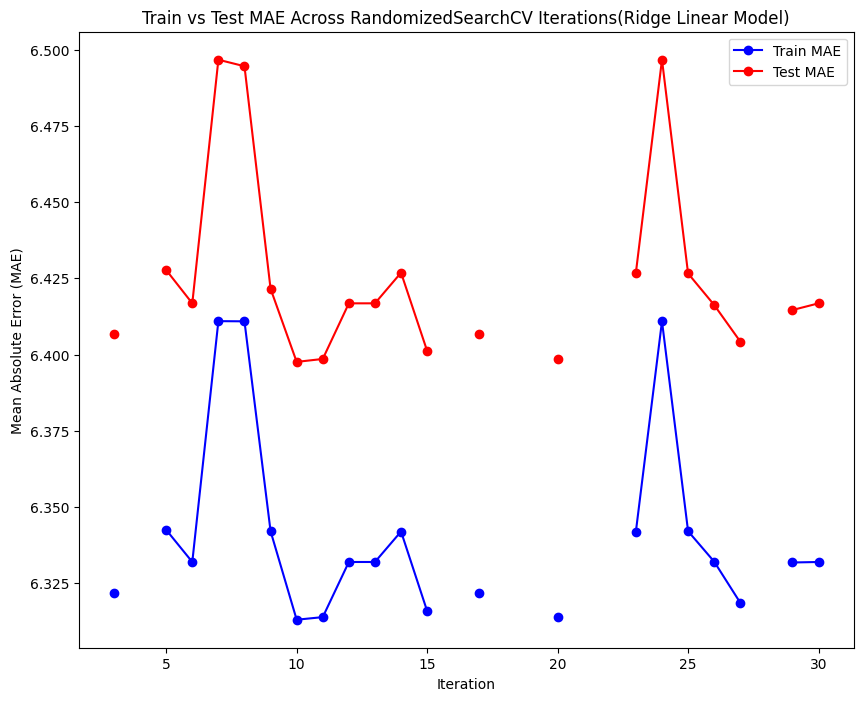

In [ ]:
# Access cross-validation results for Loss Curve
lm_cv_results = pd.DataFrame(random_search_lm_onehot.cv_results_)

# Get mean training and test scores
train_scores_lm = -lm_cv_results['mean_train_score']
test_scores_lm = -lm_cv_results['mean_test_score']

# Plot training vs test scores
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(train_scores_lm) + 1), train_scores_lm, 'bo-', label='Train MAE')
plt.plot(range(1, len(test_scores_lm) + 1), test_scores_lm, 'ro-', label='Test MAE')
plt.xlabel('Iteration')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Train vs Test MAE Across RandomizedSearchCV Iterations(Ridge Linear Model)')
plt.legend()
plt.show()


#### RandomSearchCV vs GridSearchCV

For this section, I have reduced the number of cross-validation and interations to 3 to get faster results.

In [ ]:
# Ridge Regression, with RandomisedSearchCV
model_rsv = Pipeline([
    ('preprocessor', preprocessor_onehot),
    ('model_rsv', linear_model.Ridge(random_state=15))
])

# List to store model results
model_rsv_results = []

# Parameter grid for RandomizedSearchCV
param_dist_lm = {
    'model_rsv__alpha': [0.1,0.5, 1.0],
    'model_rsv__tol':[0.0001, 0.001, 0.005, 0.01],
    'model_rsv__solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
}

# Perform randomised search with cross-validation
for seed in seeds:
  rsv_random_search = RandomizedSearchCV(
    model_rsv, param_dist_lm, n_iter=10, cv=3, random_state=15, scoring='neg_mean_absolute_error', return_train_score=True
)
  rsv_random_search.fit(train_X, train_y)
  best_lm_rsv = rsv_random_search.best_estimator_
  model_rsv_test_score = r2_score(test_y, best_lm_rsv.predict(test_X))
  model_rsv_results.append(model_rsv_test_score)

print("Best MAE for Rigde Regression:", -rsv_random_search.best_score_)
print("Best Parameters for Rigde Regression:", rsv_random_search.best_params_)
print("Test set accuracies for Rigde Regression:", model_rsv_results)
print("Mean of test set accuracies for Rigde Regression:", np.mean(model_rsv_results))

# Evaluating the predictions made by the best Ridge Model
MAE_lm= mean_absolute_error(test_y, best_lm_rsv.predict(test_X))
MSE_lm = mean_squared_error(test_y, best_lm_rsv.predict(test_X))
RMSE_lm = root_mean_squared_error(test_y, best_lm_rsv.predict(test_X))
best_lm_metrics = pd.DataFrame([MAE_lm, MSE_lm, RMSE_lm], index=['MAE_lm', 'MSE_lm', 'RMSE_lm'], columns=['Metrics'])
best_lm_metrics

Best MAE for Rigde Regression: 6.401025438568332
Best Parameters for Rigde Regression: {'model_rsv__tol': 0.01, 'model_rsv__solver': 'cholesky', 'model_rsv__alpha': 0.1}
Test set accuracies for Rigde Regression: [0.48556386729145673, 0.48556386729145673, 0.48556386729145673, 0.48556386729145673, 0.48556386729145673, 0.48556386729145673, 0.48556386729145673, 0.48556386729145673, 0.48556386729145673, 0.48556386729145673]
Mean of test set accuracies for Rigde Regression: 0.4855638672914567


,Metrics
MAE_lm,6.922153
MSE_lm,106.713705
RMSE_lm,10.330233


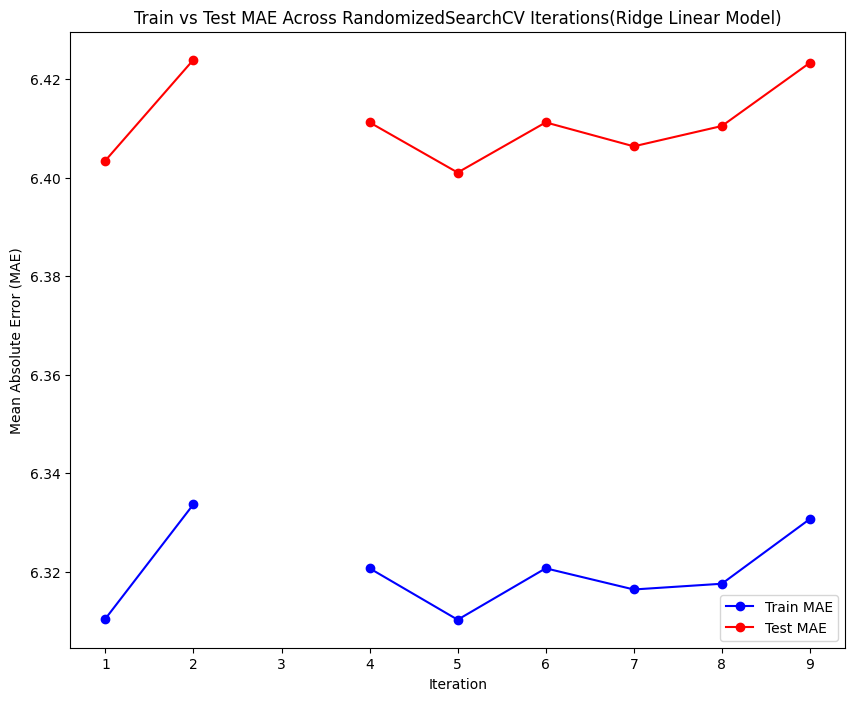

In [ ]:
# Access cross-validation results for Loss Curve
lm_rcv_results = pd.DataFrame(rsv_random_search.cv_results_)

# Get mean training and test scores
train_scores_glm = -lm_rcv_results ['mean_train_score']
test_scores_glm = -lm_rcv_results ['mean_test_score']

# Plot training vs test scores
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(train_scores_glm) + 1), train_scores_glm, 'bo-', label='Train MAE')
plt.plot(range(1, len(test_scores_glm) + 1), test_scores_glm, 'ro-', label='Test MAE')
plt.xlabel('Iteration')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Train vs Test MAE Across RandomizedSearchCV Iterations(Ridge Linear Model)')
plt.legend()
plt.show()

I am going to repeat this process using GridSearchCV to compare, which gives a better result.

In [ ]:
# Ridge Regression with GidSearchCV
model_gsv_results = []

for seed in seeds:
  gsv_random_search = GridSearchCV(
    model_rsv, param_dist_lm, cv=3, scoring='neg_mean_absolute_error', return_train_score=True
)
  gsv_random_search.fit(train_X, train_y)
  best_lm_gsv = gsv_random_search.best_estimator_
  lm2_test_score = r2_score(test_y, best_lm_gsv.predict(test_X))
  model_gsv_results.append(lm2_test_score)

print("Best MAE for Rigde:", -gsv_random_search.best_score_)
print("Best Parameters for Rigde:", gsv_random_search.best_params_)
print("Test set accuracies for Rigde:", model_gsv_results)
print("Test set mean accuracies for Rigde:", np.mean(model_gsv_results))
print(mean_squared_error(test_y, best_lm_gsv.predict(test_X)))
print(root_mean_squared_error(test_y, best_lm_gsv.predict(test_X)))
print(r2_score(test_y, best_lm_gsv.predict(test_X)))
print(mean_absolute_error(test_y, best_lm_gsv.predict(test_X)))

Best MAE for Rigde: 6.391934558108829
Best Parameters for Rigde: {'model_rsv__alpha': 0.1, 'model_rsv__solver': 'lsqr', 'model_rsv__tol': 0.01}
Test set accuracies for Rigde: [0.4857016824402469, 0.4857016824402469, 0.4857016824402469, 0.4857016824402469, 0.4857016824402469, 0.4857016824402469, 0.4857016824402469, 0.4857016824402469, 0.4857016824402469, 0.4857016824402469]
Test set mean accuracies for Rigde: 0.485701682440247
106.6851173520769
10.3288487912292
0.4857016824402469
6.924243600115868


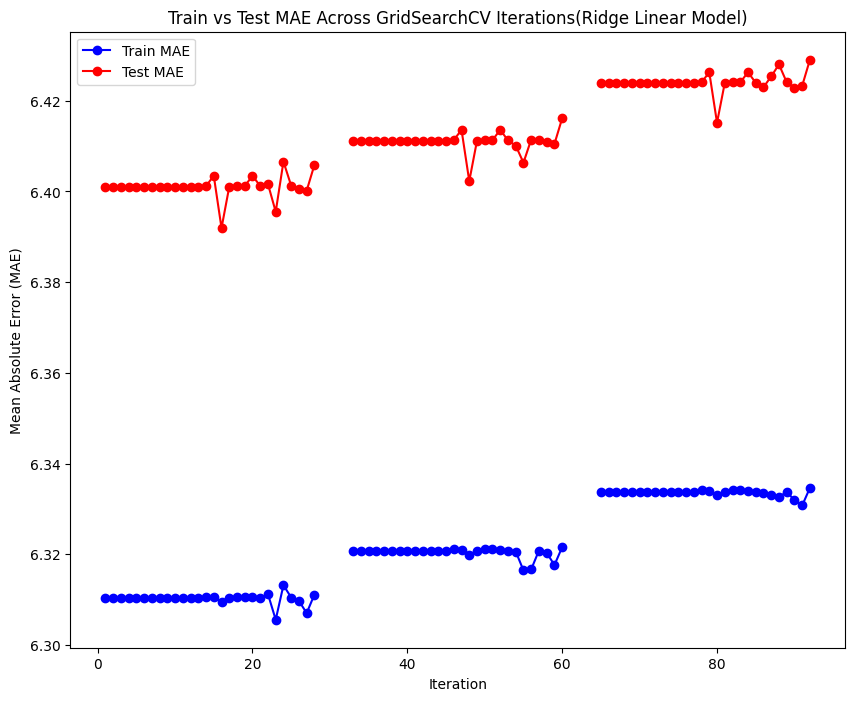

In [ ]:
# Access cross-validation results for Loss Curve
lm_gcv_results = pd.DataFrame(gsv_random_search.cv_results_)

# Get mean training and test scores
train_scores_glm = -lm_gcv_results ['mean_train_score']
test_scores_glm = -lm_gcv_results ['mean_test_score']

# Plot training vs test scores
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(train_scores_glm) + 1), train_scores_glm, 'bo-', label='Train MAE')
plt.plot(range(1, len(test_scores_glm) + 1), test_scores_glm, 'ro-', label='Test MAE')
plt.xlabel('Iteration')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Train vs Test MAE Across GridSearchCV Iterations(Ridge Linear Model)')
plt.legend()
plt.show()

In [ ]:
# Comparing the score of both Search methods
t_stat_cv, p_value_cv = ttest_rel(model_gsv_results, model_rsv_results)

print(f"T-test results: t_stat = {t_stat_cv}, p_value = {p_value_cv:.7f}")
if p_value_cv < 0.05:
    print("The difference between the rf and gb models is statistically significant.")
else:
    print("No significant difference between the models.")

T-test results: t_stat = inf, p_value = 0.0000000
The difference between the rf and gb models is statistically significant.


In [ ]:
# Checking the Variation of RandomisedSearchCV Results
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(model_rsv_results), np.std(model_rsv_results) * 2))

Accuracy: 0.49 (+/- 0.00)


In [ ]:
# Checking the Variation of GidSearchCV Results
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(model_gsv_results), np.std(model_gsv_results) * 2))

Accuracy: 0.49 (+/- 0.00)


The performance is may slightly worse for the randomized search, and is likely due to a noise effect and would not carry over to a held-out test set (From Scikit Learn)

From the result of RandomisedSearchCV and GridSearchCV on the linear model and on other models whose comparisons are not included in the notebook, I had to reduce the number of parameters for tuning and Cross-validation as the GridSearchCV takes a significant amount of time to execute as it evaluates all possible combinations of hyperparameters, the computation grows exponentially. I had to compare to see how the result might vary but there is no statistically significant difference. To reduce search space, and make it faster, for the rest of my models , I will be using RandomisedSearchCV, which randomly sample a subset of hyperparameter combinations.

* Reflection

In the pipelines above, I have combined Model Training, Predictions and evaluations, which is a more comprehensive approach, and this method ensures I am tuning hyperparameters without using the test set; I was able to prevent data leakage and perform a realistic performance estimation. On my first trial with the dataset, I chose a decision tree model and used the entire dataset to train it; when I evaluated the model, it was 100% accurate and had an MAE of 0. Now, I know that that was cheating, allowing the model to peek at the test data.


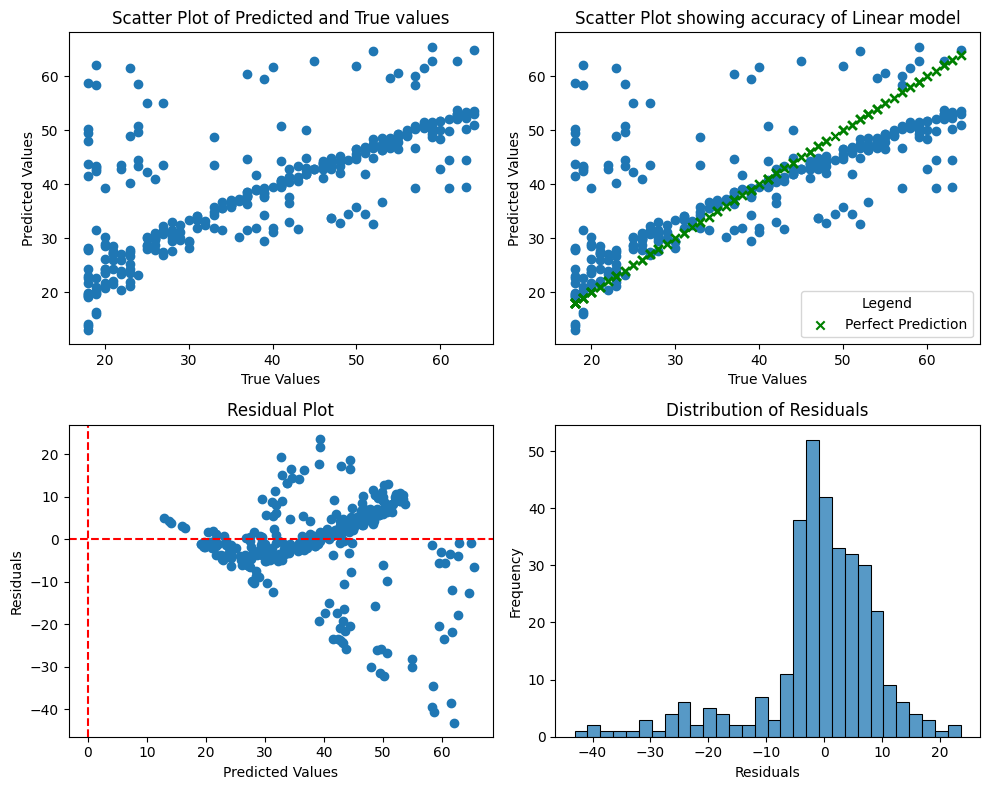

In [ ]:
# Plots for linear Model

# Getting the residuals of the linear model
residuals = test_y - best_lm_rsv.predict(test_X)

plt.figure(figsize=(10, 8))


plt.subplot(2, 2, 1)
plt.scatter(test_y, best_lm_rsv.predict(test_X))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted and True values')

plt.subplot(2, 2, 2)
plt.scatter(test_y, best_lm_rsv.predict(test_X))
plt.scatter(test_y, test_y, color='g', marker='x', label='Perfect Prediction')
plt.legend(title='Legend')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot showing accuracy of Linear model')

plt.subplot(2, 2, 3)
plt.scatter(best_lm_rsv.predict(test_X), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.subplot(2, 2, 4)
sns.histplot(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

The residuals of the linear model don't appear to be normally distributed and have a curve shape to them. This means that the model is not fully capturing the relationship between the features and the target. It doesn't have homoscedasticity.

### Ensemble Models

#### Random Forest

In [ ]:
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor_onehot),
    ('model', RandomForestRegressor(random_state=15))
])

results_rf = []

param_grid_rf = {
    'model__n_estimators': [10, 50, 100, 300],
    'model__max_depth': [None,3,5,10,],
    'model__criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'model__max_features': [None,5,10]
}


for seed in seeds:
  random_search_rf = RandomizedSearchCV(
pipeline_rf, param_grid_rf, n_iter=30, cv=10, random_state=15, scoring='neg_mean_absolute_error', return_train_score=True
)
  random_search_rf.fit(train_X, train_y)
  best_rf = random_search_rf.best_estimator_
  rf_test_scores = r2_score(test_y, best_rf.predict(test_X))
  results_rf.append(rf_test_scores)

print("Best MAE for random search:", -random_search_rf.best_score_)
print("Best Parameters for random search:", random_search_rf.best_params_)
print("Test set accuracies for Random Forest:", results_rf)
print("Test set mean accuracies for Random Forest:", np.mean(results_rf))

# Evaluating the predictions made by the best Random Forest Model
MAE_rf= mean_absolute_error(test_y, best_rf.predict(test_X))
MSE_rf = mean_squared_error(test_y, best_rf.predict(test_X))
RMSE_rf = root_mean_squared_error(test_y, best_rf.predict(test_X))
best_rf_metrics = pd.DataFrame([MAE_rf, MSE_rf, RMSE_rf], index=['MAE_rf', 'MSE_rf', 'RMSE_rf'], columns=['Metrics'])
best_rf_metrics

Best MAE for random search: 2.858923727066584
Best Parameters for random search: {'model__n_estimators': 50, 'model__max_features': 10, 'model__max_depth': None, 'model__criterion': 'squared_error'}
Test set accuracies for Random Forest: [0.7840478873414012, 0.7840478873414012, 0.7840478873414012, 0.7840478873414012, 0.7840478873414012, 0.7840478873414012, 0.7840478873414012, 0.7840478873414012, 0.7840478873414012, 0.7840478873414012]
Test set mean accuracies for Random Forest: 0.7840478873414012


,Metrics
MAE_rf,3.233455
MSE_rf,44.796718
RMSE_rf,6.693035


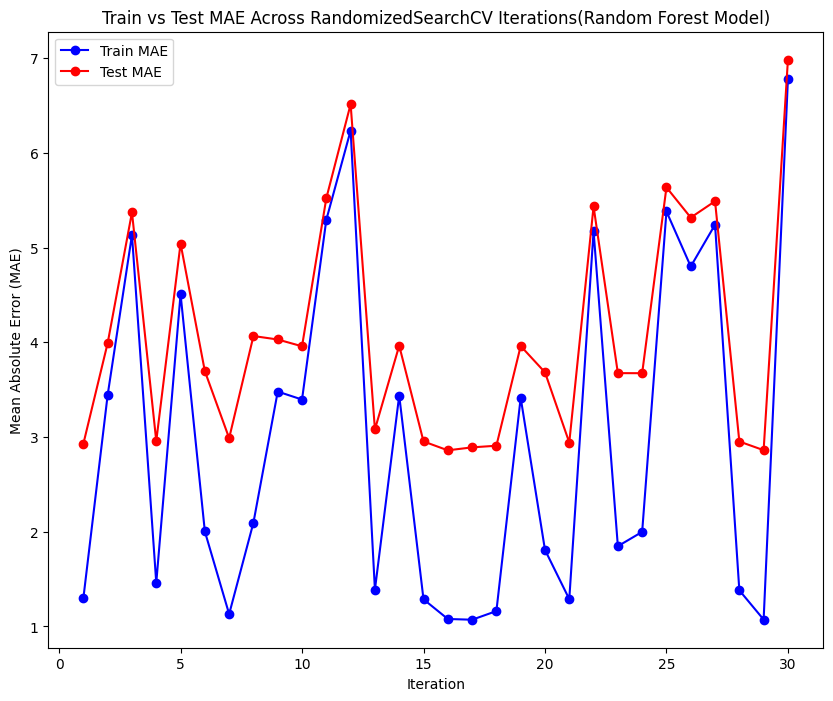

In [ ]:
# Access cross-validation results for Loss Curve
rf_cv_results = pd.DataFrame(random_search_rf.cv_results_)

# Get mean training and test scores
train_scores_rf = -rf_cv_results['mean_train_score']
test_scores_rf = -rf_cv_results['mean_test_score']

# Plot training vs test scores
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(train_scores_rf) + 1), train_scores_rf, 'bo-', label='Train MAE')
plt.plot(range(1, len(test_scores_rf) + 1), test_scores_rf, 'ro-', label='Test MAE')
plt.xlabel('Iteration')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Train vs Test MAE Across RandomizedSearchCV Iterations(Random Forest Model)')
plt.legend()
plt.show()




In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(results_rf), np.std(results_rf) * 2))

Accuracy: 0.78 (+/- 0.00)


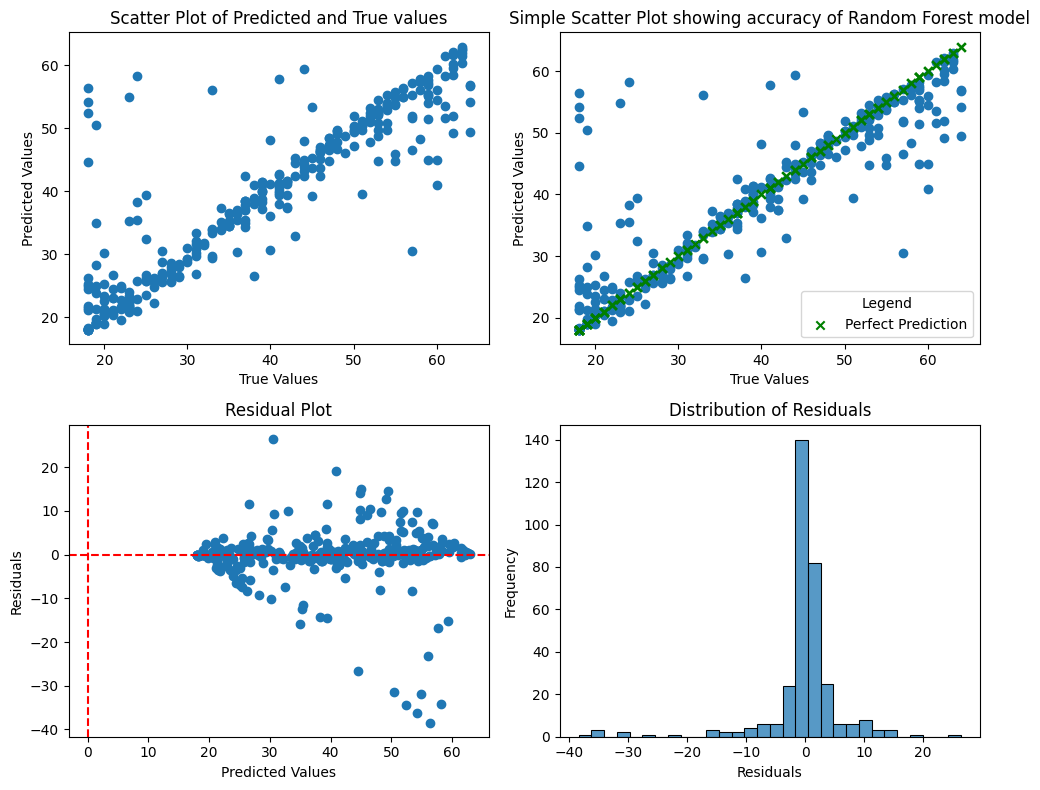

In [ ]:
# Plots for Random Forest

# Getting the residuals of the Random Forest model
residuals_rf = test_y - best_rf.predict(test_X)

plt.figure(figsize=(10, 8))


plt.subplot(2, 2, 1)
plt.scatter(test_y, best_rf.predict(test_X))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted and True values')

plt.subplot(2, 2, 2)
plt.scatter(test_y, best_rf.predict(test_X))
plt.scatter(test_y, test_y, color='g', marker='x', label='Perfect Prediction')
plt.legend(title='Legend')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Simple Scatter Plot showing accuracy of Random Forest model')

plt.subplot(2, 2, 3)
plt.scatter(best_rf.predict(test_X), residuals_rf)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.subplot(2, 2, 4)
sns.histplot(residuals_rf, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

The distributions of the residuals are centered closer to the Zero mean. However, there are still instances of heteroscedasticity.

#### Gradient boosting

In [ ]:
pipeline_gb = Pipeline([
    ('preprocessor', preprocessor_onehot),
    ('model', GradientBoostingRegressor(random_state=15))
])

results_gb = []

param_grid_gb = {
    'model__n_estimators': [50, 100, 200, 300],
    'model__max_features': [5, 10, None],
    'model__max_depth': [None, 5,3,10],
    'model__criterion' : ['friedman_mse', 'squared_error'],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__alpha': [0.5,0.9,1.0],
}


for seed in seeds:
  random_search_gb = RandomizedSearchCV(
pipeline_gb, param_grid_gb, n_iter=30, cv=10, random_state=15, scoring='neg_mean_absolute_error', return_train_score=True
)
  random_search_gb.fit(train_X, train_y)
  best_gb = random_search_gb.best_estimator_
  gb_test_scores = r2_score(test_y, best_gb.predict(test_X))
  results_gb.append(gb_test_scores)


print("Best MAE for random search:", -random_search_gb.best_score_)
print("Best Parameters for random search:", random_search_gb.best_params_)
print("Test set accuracies for Gradient Boosting:", results_gb)
print("Test set mean accuracies for Gradient Boosting:", np.mean(results_gb))

# Evaluating the predictions made by the best Gradient Boosting Model
MAE_gb = mean_absolute_error(test_y, best_gb.predict(test_X))
MSE_gb = mean_squared_error(test_y, best_gb.predict(test_X))
RMSE_gb = root_mean_squared_error(test_y, best_gb.predict(test_X))
best_gb_metrics = pd.DataFrame([MAE_gb, MSE_gb, RMSE_gb], index=['MAE_gb', 'MSE_gb', 'RMSE_gb'], columns=['Metrics'])
best_gb_metrics

Best MAE for random search: 2.8464187954790194
Best Parameters for random search: {'model__n_estimators': 200, 'model__max_features': 10, 'model__max_depth': 5, 'model__learning_rate': 0.05, 'model__criterion': 'squared_error', 'model__alpha': 0.9}
Test set accuracies for Gradient Boosting: [0.7943788878458559, 0.7943788878458559, 0.7943788878458559, 0.7943788878458559, 0.7943788878458559, 0.7943788878458559, 0.7943788878458559, 0.7943788878458559, 0.7943788878458559, 0.7943788878458559]
Test set mean accuracies for Gradient Boosting: 0.7943788878458558


,Metrics
MAE_gb,3.036309
MSE_gb,42.653673
RMSE_gb,6.530978


In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(results_gb), np.std(results_gb) * 2))

Accuracy: 0.79 (+/- 0.00)


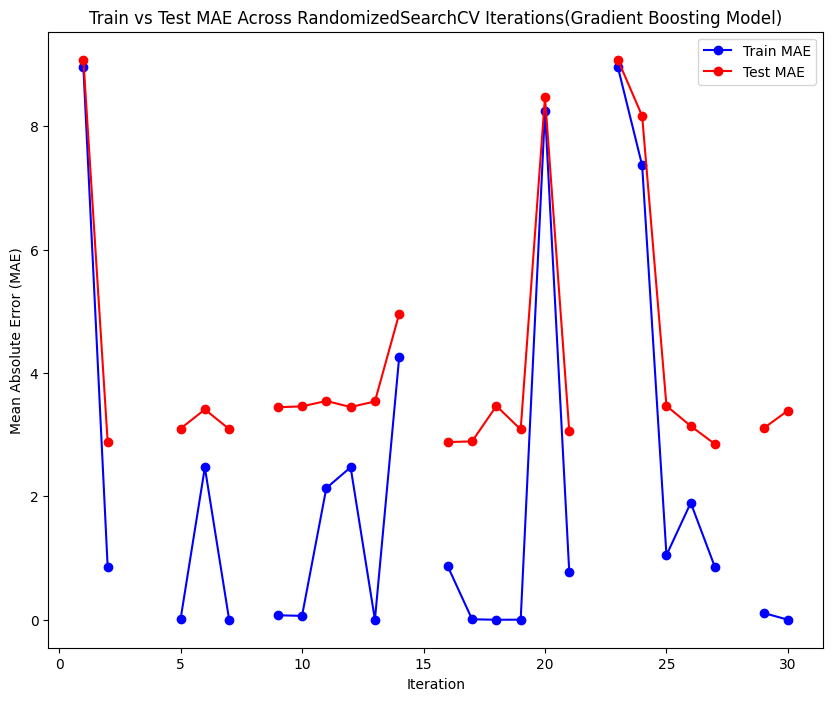

In [ ]:
# Access cross-validation results for Loss Curve
gb_cv_results = pd.DataFrame(random_search_gb.cv_results_)

# Get mean training and test scores
train_scores_gb = -gb_cv_results['mean_train_score']
test_scores_gb = -gb_cv_results['mean_test_score']

# Plot training vs test scores
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(train_scores_gb) + 1), train_scores_gb, 'bo-', label='Train MAE')
plt.plot(range(1, len(test_scores_gb) + 1), test_scores_gb, 'ro-', label='Test MAE')
plt.xlabel('Iteration')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Train vs Test MAE Across RandomizedSearchCV Iterations(Gradient Boosting Model)')
plt.legend()
plt.show()

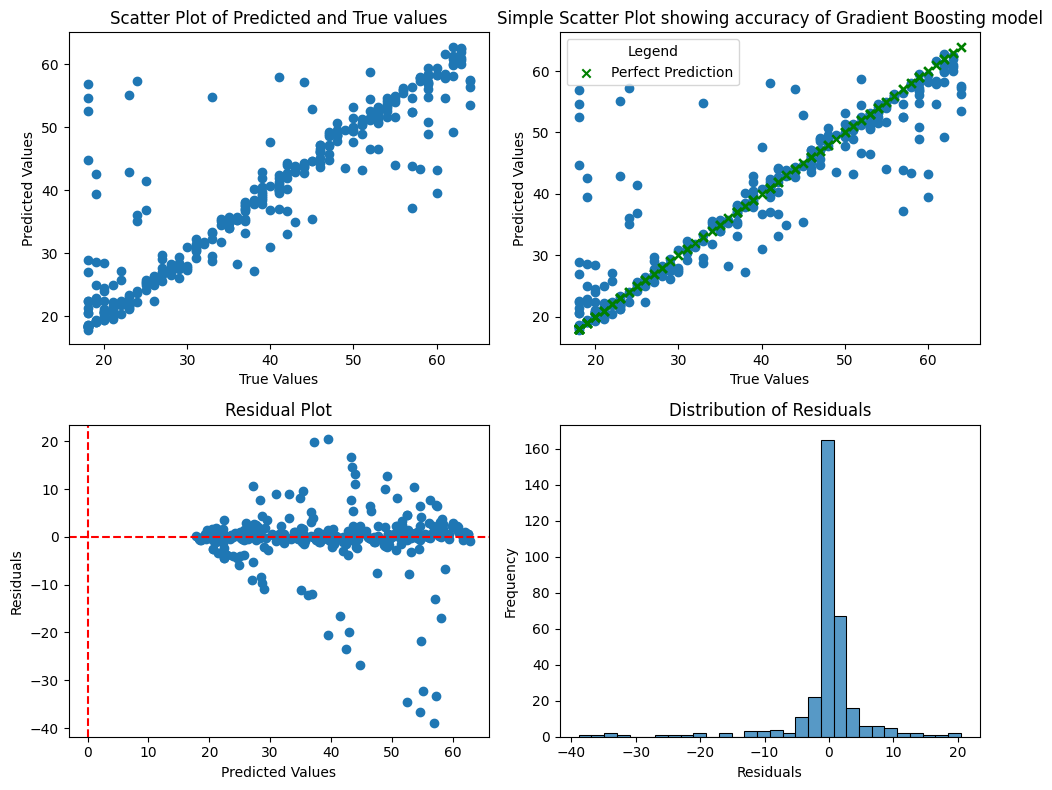

In [ ]:
# Plots for Random Forest

# Getting the residuals of the Gradient Boosting model
residuals_gb = test_y - best_gb.predict(test_X)

plt.figure(figsize=(10, 8))


plt.subplot(2, 2, 1)
plt.scatter(test_y, best_gb.predict(test_X))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted and True values')

plt.subplot(2, 2, 2)
plt.scatter(test_y, best_gb.predict(test_X))
plt.scatter(test_y, test_y, color='g', marker='x', label='Perfect Prediction')
plt.legend(title='Legend')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Simple Scatter Plot showing accuracy of Gradient Boosting model')

plt.subplot(2, 2, 3)
plt.scatter(best_gb.predict(test_X), residuals_gb)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.subplot(2, 2, 4)
sns.histplot(residuals_gb, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

The distribution is still centred around the Zero mean with instances of heteroscedasticity

### Decision Tree

In [ ]:
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor_onehot),
    ('model', DecisionTreeRegressor(random_state=15))
])

results_dt = []

param_grid_dt = {
    'model__max_features': [None,5, 3,10],
    'model__max_depth': [None, 3, 5,10,],
    'model__criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'model__splitter': ['best', 'random']
}


for seed in seeds:
  random_search_dt = RandomizedSearchCV(
pipeline_dt, param_grid_dt, n_iter=30, cv=10, random_state=15, scoring='neg_mean_absolute_error', return_train_score=True
)
  random_search_dt.fit(train_X, train_y)
  best_dt = random_search_dt.best_estimator_
  dt_test_scores = r2_score(test_y, best_dt.predict(test_X))
  results_dt.append(dt_test_scores)


print("Best Parameters for random search:", -random_search_dt.best_score_)
print("Best Parameters for random search:", random_search_dt.best_params_)
print("Test set accuracies for Gradient Boosting:", results_dt)
print("Test set mean accuracies for Gradient Boosting:", np.mean(results_dt))

# Evaluating the predictions made by the best Gradient Boosting Model
MAE_dt = mean_absolute_error(test_y, best_dt.predict(test_X))
MSE_dt = mean_squared_error(test_y, best_dt.predict(test_X))
RMSE_dt = root_mean_squared_error(test_y, best_dt.predict(test_X))
best_dt_metrics = pd.DataFrame([MAE_dt, MSE_dt, RMSE_dt], index=['MAE_dt', 'MSE_dt', 'RMSE_dt'], columns=['Metrics'])
best_dt_metrics

Best Parameters for random search: 3.1899505256648117
Best Parameters for random search: {'model__splitter': 'best', 'model__max_features': 10, 'model__max_depth': None, 'model__criterion': 'poisson'}
Test set accuracies for Gradient Boosting: [0.6719285773098032, 0.6719285773098032, 0.6719285773098032, 0.6719285773098032, 0.6719285773098032, 0.6719285773098032, 0.6719285773098032, 0.6719285773098032, 0.6719285773098032, 0.6719285773098032]
Test set mean accuracies for Gradient Boosting: 0.6719285773098032


,Metrics
MAE_dt,3.969697
MSE_dt,68.054545
RMSE_dt,8.249518


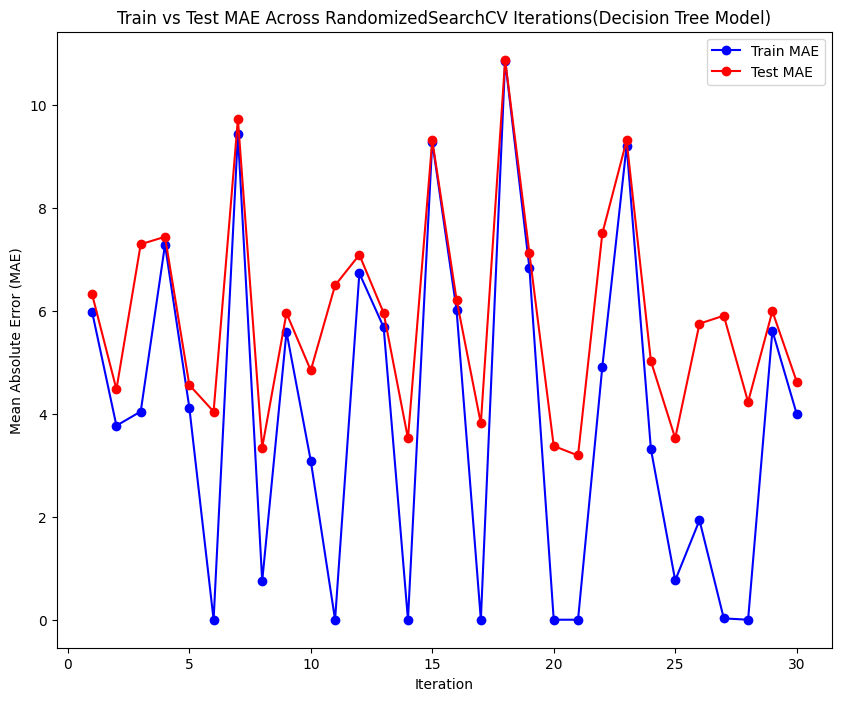

In [ ]:
# Access cross-validation results for Loss Curve
dt_cv_results = pd.DataFrame(random_search_dt.cv_results_)

# Get mean training and test scores
train_scores_dt = -dt_cv_results['mean_train_score']
test_scores_dt = -dt_cv_results['mean_test_score']

# Plot training vs test scores
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(train_scores_dt) + 1), train_scores_dt, 'bo-', label='Train MAE')
plt.plot(range(1, len(test_scores_dt) + 1), test_scores_dt, 'ro-', label='Test MAE')
plt.xlabel('Iteration')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Train vs Test MAE Across RandomizedSearchCV Iterations(Decision Tree Model)')
plt.legend()
plt.show()

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(results_dt), np.std(results_dt) * 2))

Accuracy: 0.67 (+/- 0.00)


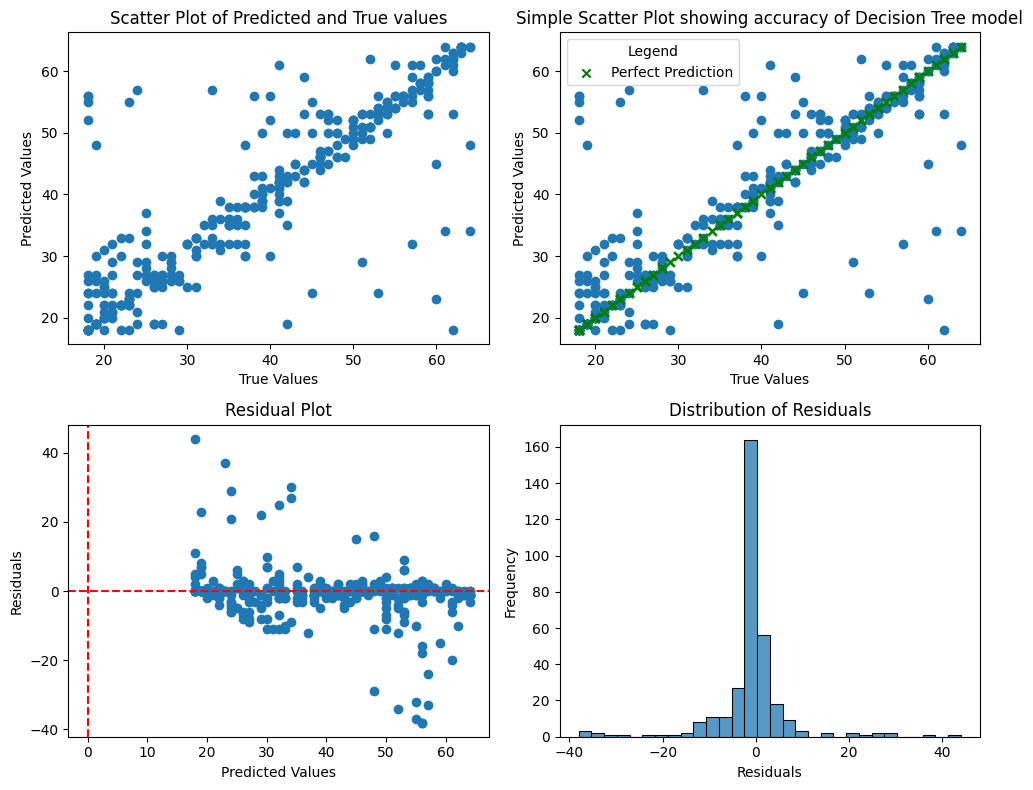

In [ ]:
# Plots for Random Forest

# Getting the residuals of the Gradient Boosting model
residuals_dt = test_y - best_dt.predict(test_X)

plt.figure(figsize=(10, 8))


plt.subplot(2, 2, 1)
plt.scatter(test_y, best_dt.predict(test_X))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted and True values')

plt.subplot(2, 2, 2)
plt.scatter(test_y, best_dt.predict(test_X))
plt.scatter(test_y, test_y, color='g', marker='x', label='Perfect Prediction')
plt.legend(title='Legend')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Simple Scatter Plot showing accuracy of Decision Tree model')

plt.subplot(2, 2, 3)
plt.scatter(best_dt.predict(test_X), residuals_dt)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.subplot(2, 2, 4)
sns.histplot(residuals_dt, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

This distribution has better centring around the zero line, indicating that the model is less biased and the heteroscedasticity is less pronounced.

### Preprocessing with MinMaxScaler

In [ ]:
preprocessor_minmax = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_data),
        ('cat', OneHotEncoder(), categorical_data)
    ]
)

In [ ]:
pipeline_gb_minmax = Pipeline([
    ('preprocessor', preprocessor_minmax),
    ('model', GradientBoostingRegressor(random_state=15))
])

results_minmax = []

param_grid_gb_minmax = {
    'model__n_estimators': [50,100, 200, 300],
    'model__max_features': [5, 10, None],
    'model__max_depth': [None, 5,3,10,],
    'model__criterion' : ['friedman_mse', 'squared_error'],
    'model__learning_rate': [ 0.01, 0.1, 0.5],
    'model__alpha': [0.5,0.9,1.0],
}


for seed in seeds:
  random_search_gb_minmax = RandomizedSearchCV(
pipeline_gb_minmax, param_grid_gb_minmax, n_iter=30, cv=10, random_state=15, scoring='neg_mean_absolute_error', return_train_score=True
)
  random_search_gb_minmax.fit(train_X, train_y)
  best_gb_minmax = random_search_gb_minmax.best_estimator_
  gb_minmax_test_scores = r2_score(test_y, best_gb_minmax.predict(test_X))
  results_minmax.append(gb_minmax_test_scores)


print("Best Parameters for random search:", -random_search_gb_minmax.best_score_)
print("Best Parameters for random search:", random_search_gb_minmax.best_params_)
print("Test set accuracies for Gradient Boosting:", results_minmax)
print("Test set mean accuracies for Gradient Boosting:", np.mean(results_minmax))

# Evaluating the predictions made by the best Gradient Boosting Model
MAE_gb_minmax = mean_absolute_error(test_y, best_gb_minmax.predict(test_X))
MSE_gb_minmax = mean_squared_error(test_y, best_gb_minmax.predict(test_X))
RMSE_gb_minmax = root_mean_squared_error(test_y, best_gb_minmax.predict(test_X))
best_gb_minmax_metrics = pd.DataFrame([MAE_gb_minmax, MSE_gb_minmax, RMSE_gb_minmax], index=['MAE_gb_minmax', 'MSE_gb_minmax', 'RMSE_gb_minmax'], columns=['Metrics'])
best_gb_minmax_metrics

Best Parameters for random search: 2.8438174381589234
Best Parameters for random search: {'model__n_estimators': 200, 'model__max_features': 10, 'model__max_depth': 5, 'model__learning_rate': 0.1, 'model__criterion': 'squared_error', 'model__alpha': 0.9}
Test set accuracies for Gradient Boosting: [0.7855368362200179, 0.7855368362200179, 0.7855368362200179, 0.7855368362200179, 0.7855368362200179, 0.7855368362200179, 0.7855368362200179, 0.7855368362200179, 0.7855368362200179, 0.7855368362200179]
Test set mean accuracies for Gradient Boosting: 0.7855368362200179


,Metrics
MAE_gb_minmax,3.012115
MSE_gb_minmax,44.487853
RMSE_gb_minmax,6.669921


In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(results_minmax), np.std(results_minmax) * 2))

Accuracy: 0.79 (+/- 0.00)


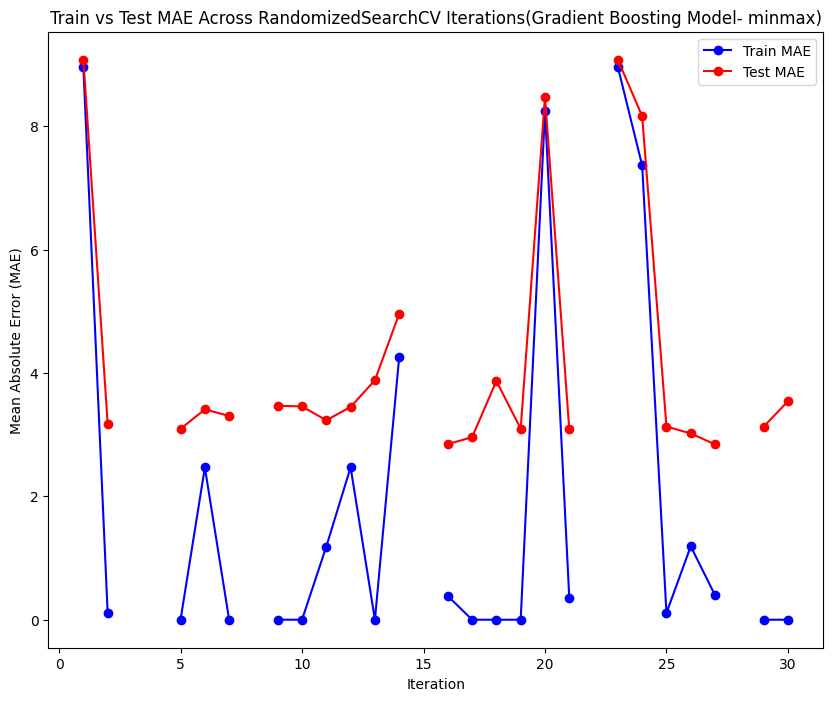

In [ ]:
# Access cross-validation results for Loss Curve

minmax_cv_results = pd.DataFrame(random_search_gb_minmax.cv_results_)

# Get mean training and test scores
train_scores_minmax = -minmax_cv_results['mean_train_score']
test_scores_minmax = -minmax_cv_results['mean_test_score']

# Plot training vs test scores
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(train_scores_minmax) + 1), train_scores_minmax, 'bo-', label='Train MAE')
plt.plot(range(1, len(test_scores_minmax) + 1), test_scores_minmax, 'ro-', label='Test MAE')
plt.xlabel('Iteration')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Train vs Test MAE Across RandomizedSearchCV Iterations(Gradient Boosting Model- minmax)')
plt.legend()
plt.show()

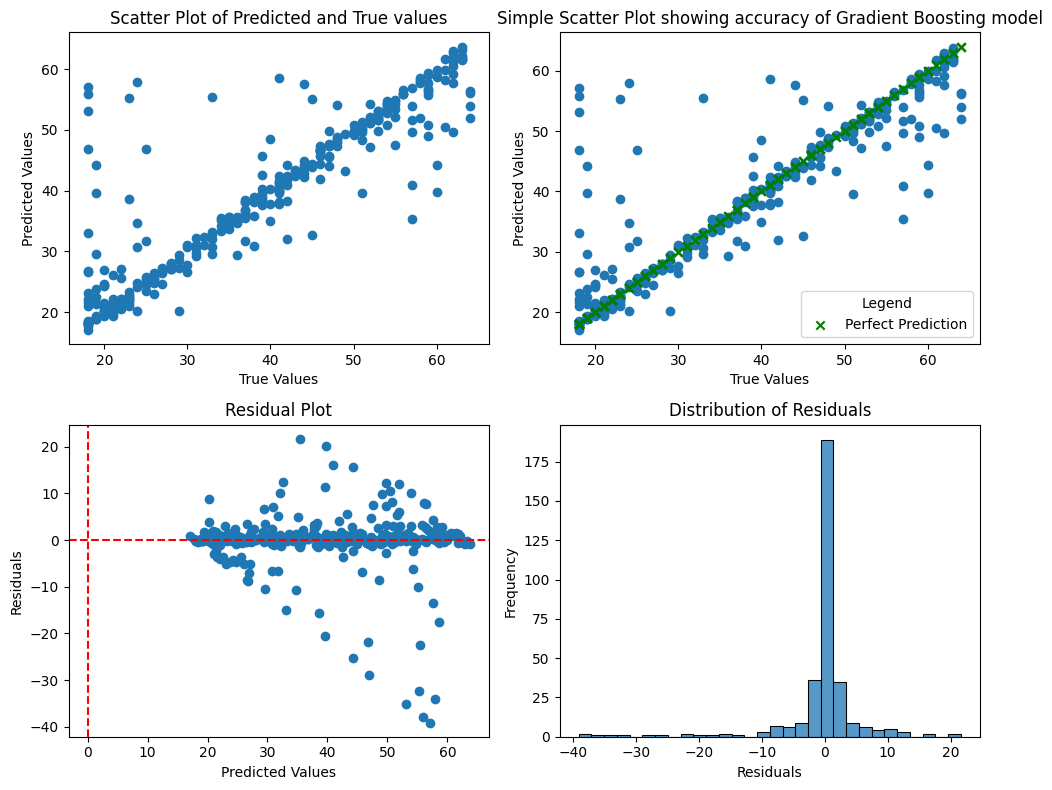

In [ ]:
# Plots for Random Forest

# Getting the residuals of the Gradient Boosting model
residuals_minmax = test_y - best_gb_minmax.predict(test_X)

plt.figure(figsize=(10, 8))


plt.subplot(2, 2, 1)
plt.scatter(test_y, best_gb_minmax.predict(test_X))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted and True values')

plt.subplot(2, 2, 2)
plt.scatter(test_y, best_gb_minmax.predict(test_X))
plt.scatter(test_y, test_y, color='g', marker='x', label='Perfect Prediction')
plt.legend(title='Legend')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Simple Scatter Plot showing accuracy of Gradient Boosting model')

plt.subplot(2, 2, 3)
plt.scatter(best_gb_minmax.predict(test_X), residuals_minmax)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.subplot(2, 2, 4)
sns.histplot(residuals_minmax, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

In [ ]:
# Comparing the result of SCaling Methods
t_stat_scaler, p_value_scaler = ttest_rel(results_gb, results_minmax)
print("t-statistic:", t_stat_scaler)
print("p-value:", p_value_scaler)

if p_value_scaler < 0.05:
    print("The results are statistically significant.")
else:
    print("The results are not statistically significant.")

t-statistic: inf
p-value: 0.0
The results are statistically significant.


From the above, we can see no significant difference between scaling with StandardCaller and MinMaxScaler, as the t_statistic could not be determined.

### Unscaled Data

In [ ]:
preprocessor_noscl = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_data)
    ]
)

In [ ]:
pipeline_noscl = Pipeline([
    ('preprocessor', preprocessor_noscl),
    ('model', GradientBoostingRegressor(random_state=15))
])

results_noscl = []

param_grid_noscl = {
    'model__n_estimators': [50, 100, 200, 300],
    'model__max_features': [5, 10, None],
    'model__max_depth': [None, 5,6,10,],
    'model__criterion' : ['friedman_mse', 'squared_error'],
    'model__learning_rate': [ 0.001, 0.05, 0.1, 0.5],
    'model__alpha': [0.5,0.9,1.0],
}


for seed in seeds:
  random_search_noscl = RandomizedSearchCV(
pipeline_noscl, param_grid_noscl, n_iter=30, cv=10, random_state=15, scoring='neg_mean_absolute_error', return_train_score=True
)
  random_search_noscl.fit(train_X, train_y)
  best_noscl = random_search_noscl.best_estimator_
  noscl_test_scores = r2_score(test_y, best_noscl.predict(test_X))
  results_noscl.append(noscl_test_scores)


print("Best Parameters for random search:", -random_search_noscl.best_score_)
print("Best Parameters for random search:", random_search_noscl.best_params_)
print("Test set accuracies for Gradient Boosting:", results_noscl)
print("Test set mean accuracies for Gradient Boosting:", np.mean(results_noscl))

# Evaluating the predictions made by the best Gradient Boosting Model
MAE_noscl = mean_absolute_error(test_y, best_noscl.predict(test_X))
R_square_noscl = r2_score(test_y, best_noscl.predict(test_X))
MSE_noscl = mean_squared_error(test_y, best_noscl.predict(test_X))
RMSE_noscl = root_mean_squared_error(test_y, best_noscl.predict(test_X))
best_noscl_metrics = pd.DataFrame([MAE_noscl, R_square_noscl,MSE_noscl, RMSE_noscl], index=['MAE_noscl', 'R_square_noscl', 'MSE_noscl', 'RMSE_noscl'], columns=['Metrics'])
best_noscl_metrics

Best Parameters for random search: 12.211312393859767
Best Parameters for random search: {'model__n_estimators': 50, 'model__max_features': 5, 'model__max_depth': None, 'model__learning_rate': 0.001, 'model__criterion': 'friedman_mse', 'model__alpha': 0.5}
Test set accuracies for Gradient Boosting: [-0.003872591175345219, -0.003872591175345219, -0.003872591175345219, -0.003872591175345219, -0.003872591175345219, -0.003872591175345219, -0.003872591175345219, -0.003872591175345219, -0.003872591175345219, -0.003872591175345219]
Test set mean accuracies for Gradient Boosting: -0.003872591175345219


,Metrics
MAE_noscl,12.593258
R_square_noscl,-0.003873
MSE_noscl,208.241524
RMSE_noscl,14.430576


In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(results_noscl), np.std(results_noscl) * 2))


Accuracy: -0.00 (+/- 0.00)


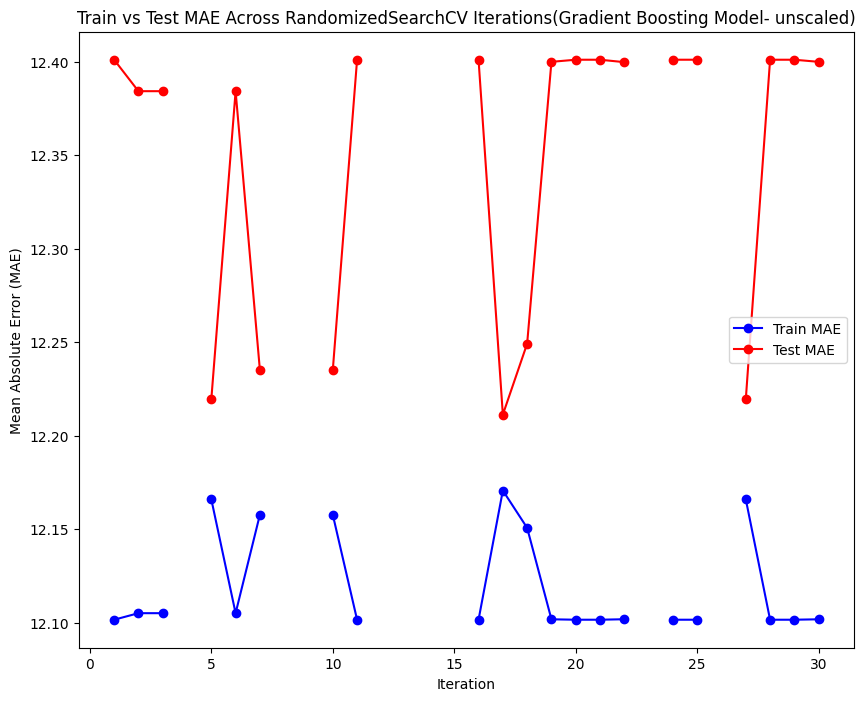

In [ ]:
# Access cross-validation results for Loss Curve
noscl_cv_results = pd.DataFrame(random_search_noscl.cv_results_)

# Get mean training and test scores
train_scores_noscl = -noscl_cv_results['mean_train_score']
test_scores_noscl = -noscl_cv_results['mean_test_score']

# Plot training vs test scores
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(train_scores_noscl) + 1), train_scores_noscl, 'bo-', label='Train MAE')
plt.plot(range(1, len(test_scores_noscl) + 1), test_scores_noscl, 'ro-', label='Test MAE')
plt.xlabel('Iteration')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Train vs Test MAE Across RandomizedSearchCV Iterations(Gradient Boosting Model- unscaled)')
plt.legend()
plt.show()

In [ ]:
# Comparing the result of SCaling Methods
t_stat_scl, p_value_scl = ttest_rel(results_gb, results_noscl)
print("t-statistic:", t_stat_scl)
print("p-value:", p_value_scl)

if p_value_scl < 0.05:
    print("The results are statistically significant.")
else:
    print("The results are not statistically significant.")

t-statistic: inf
p-value: 0.0
The results are statistically significant.


Comparing the results of the standard scaling and no scaling, there is a vast difference between the results. So scaling the data is a crucial step.

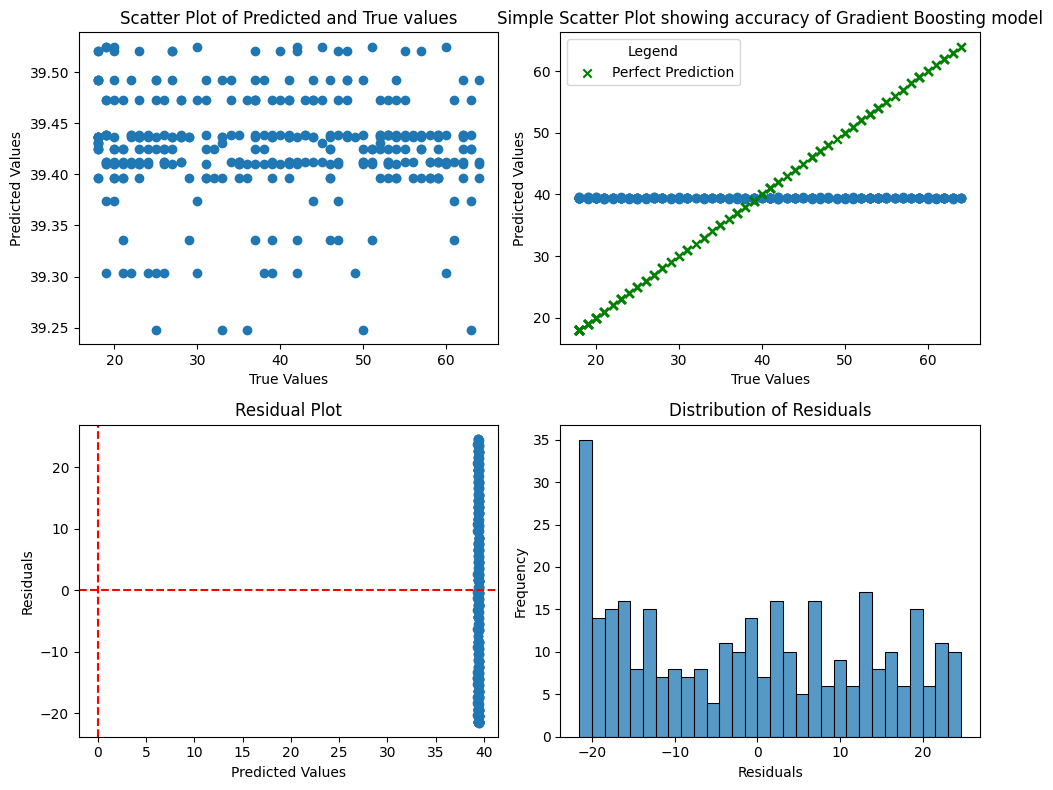

In [ ]:
# Plots for Random Forest

# Getting the residuals of the Gradient Boosting model
residuals_noscl = test_y - best_noscl.predict(test_X)

plt.figure(figsize=(10, 8))


plt.subplot(2, 2, 1)
plt.scatter(test_y, best_noscl.predict(test_X))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted and True values')

plt.subplot(2, 2, 2)
plt.scatter(test_y, best_noscl.predict(test_X))
plt.scatter(test_y, test_y, color='g', marker='x', label='Perfect Prediction')
plt.legend(title='Legend')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Simple Scatter Plot showing accuracy of Gradient Boosting model')

plt.subplot(2, 2, 3)
plt.scatter(best_noscl.predict(test_X), residuals_noscl)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.subplot(2, 2, 4)
sns.histplot(residuals_noscl, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

Not scaling the numerical data resulted in an uniform spread, tight cluster, suggesting that the model is making consistent predictions within this range and some predicted values have concentrated residuals, potentially indicating systematic error..

## Predicting Missing Values
I will be using the random forest model, best_rf, to predict the missing values because it has the higher accuracy

In [ ]:
# Splitting missing data
X_values = missing_data.drop('age', axis=1)
y_values = missing_data['age']

# Predicting
predictions =  best_rf.predict(X_values)
rounded_predictions = np.round(predictions)

# Imputing missing values
missing_data['age'] = rounded_predictions
print(missing_data.describe(include='all'))

print(f"Number of missing 'age' values after imputation: {missing_data['age'].isnull().sum()}")
print(f"Range of 'age' after imputation: {missing_data['age'].min()} - {missing_data['age'].max()}")


              age     sex        bmi  children smoker     region    charges
count   20.000000      20  20.000000  20.00000     20         20  20.000000
unique        NaN       2        NaN       NaN      2          4        NaN
top           NaN  female        NaN       NaN     no  southeast        NaN
freq          NaN      11        NaN       NaN     16         11        NaN
mean    37.650000     NaN  33.266000   0.85000    NaN        NaN   3.913198
std     10.950967     NaN   7.553735   1.03999    NaN        NaN   0.460360
min     18.000000     NaN  20.800000   0.00000    NaN        NaN   3.210101
25%     30.000000     NaN  27.521250   0.00000    NaN        NaN   3.607330
50%     36.000000     NaN  32.600000   0.50000    NaN        NaN   3.811303
75%     47.000000     NaN  38.496250   1.25000    NaN        NaN   4.164797
max     59.000000     NaN  46.200000   3.00000    NaN        NaN   4.664651
Number of missing 'age' values after imputation: 0
Range of 'age' after imputation: 18.0

We can see that the missing values occurred more in the Female category of the sex data.

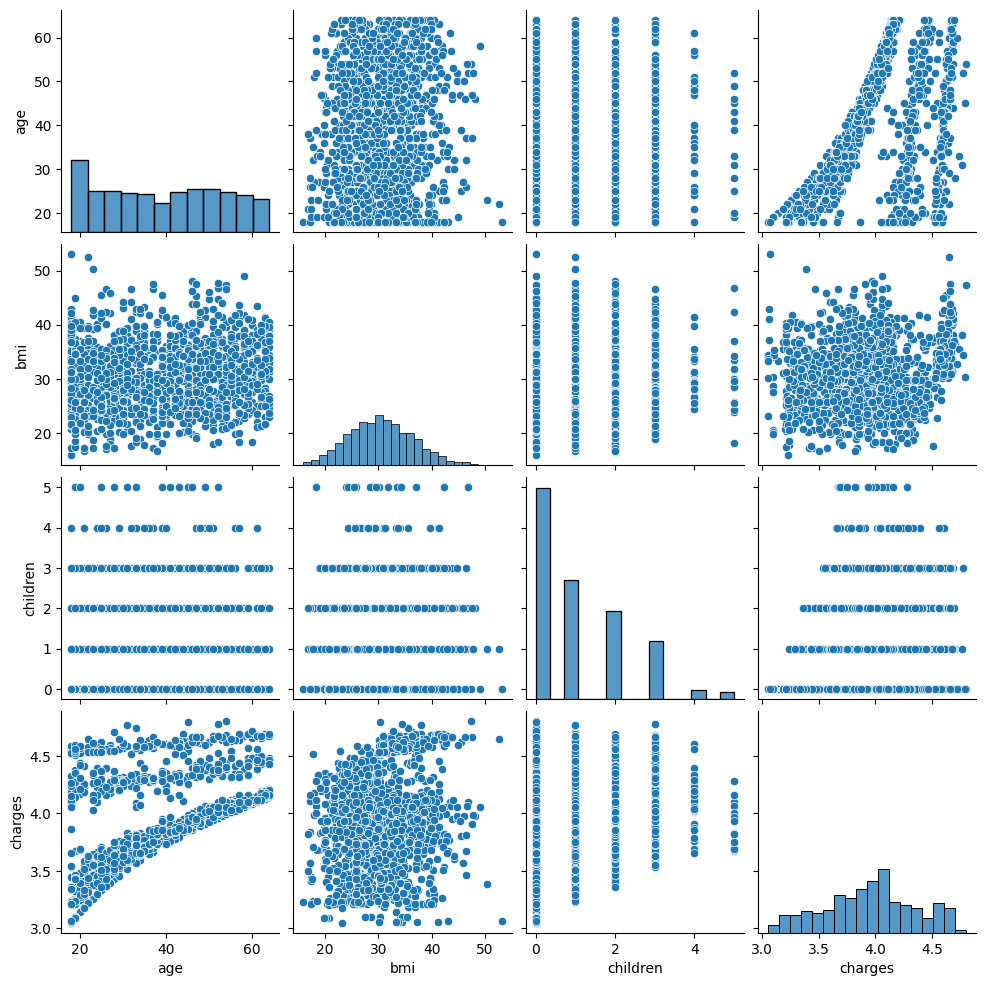

In [ ]:
# Making a new dataframe with imputed values
df_imputed = pd.concat([non_missing_data, missing_data])

# visualising the data
sns.pairplot(df_imputed)

([<matplotlib.axis.XTick at 0x7ab9db9294e0>,
 [Text(25, 0, '15-35'), Text(45, 0, '35-55'), Text(65, 0, '55-75')])

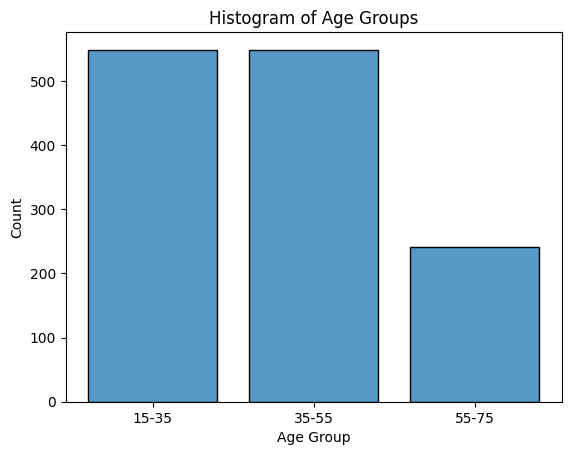

In [ ]:
bins = [15, 35, 55, 75]  # Define bin edges for the age groups
sns.histplot(df_imputed['age'], kde=False, bins=bins, shrink=0.8)  # Adjust shrink to introduce gaps
plt.title('Histogram of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(ticks=[25, 45, 65], labels=['15-35', '35-55', '55-75'])

After imputing the missing values, the age data is still unevenly distributed. I took the log of the age data and performed the workflow on it, but it did not give a better result. So, it is safe to conclude that the dataset has a bias, which may have occurred during the collection or collation of the data.

## Conclusion

During this project, I understood how vital preprocessing steps, like scaling, are for performance. I have also learned that Identifying bias in models and data sets, relationships between variables, and Careful feature selection are essential to preventing discriminatory models. When working on any dataset, the goal is not just to predict accurately but also to understand the underlying factors influencing insurance costs while maintaining model generalizability and performance, and determining how different models capture different aspects of the data. I have also understood Insurance pricing can perpetuate societal Biases. Also, how can reducing the parameters for tuning help with overfitting.

I explored other preprocessing techniques like data augmentation, dimensionality reduction, and feature engineering methods like polynomial features to see what effect it would have on the model and performed other cross validation on the models.

Overall, I have learned the importance of comprehensive data exploration, understood the nuances of model selection and hyperparameter tuning, recognised the need for continuous learning and model improvement, and how transparency in model development is key.

## References
Gemini (2024). Code explained by 1.5 Flash. Google. December 12, 2024

Gemini (2024). Code modified by 1.5 Flash. Google. December 12, 2024

ChatGPT, 2024. Code modified and explained by GPT-4o mini. OpenAI, (Outliers, November 16).

ChatGPT, 2024. Code explanined by GPT-4o mini. OpenAI, (Hyperparameter Tuning and Cross Validation Methods, December 6).

ChatGPT, 2024. Code explanined by GPT-4o mini. OpenAI, (Dataset Preprocessing, December 8).

Haixia, Lui. 2024, Lecture Workbooks.

Shoroog Albalawi, , Lama Alshahrani, , A’aeshah Alhakamy, , Nouf Albalawi, and Rawan Alharbi, (2023) Prediction of Healthcare Insurance Costs. Computers and Informatics [online]. 3 (1), pp. 11-18. [Accessed 07 December 2024].